In [1]:
import numpy as np
import matplotlib.pylab as plt
import torch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Quine itself 

In [3]:
class VanillaQuine(nn.Module):
    
    def __init__(self, input_size = 1, embedding_size = 100, layer_size = 100, output_size = 1):
        super(VanillaQuine, self).__init__()
        
        self.linear_layer_size = embedding_size * layer_size
        
        self.embedding = nn.Embedding(embedding_dim=embedding_size, num_embeddings=self.get_num_of_parameters())
        self.linear = nn.Linear(embedding_size, layer_size, bias=False)
        self.output = nn.Linear(layer_size, output_size, bias=False)
        
    def forward(self, x):
        z = self.embedding(x)
        z = F.selu(self.linear(z))
        out = self.output(z)
        return out
        
    def get_num_of_parameters(self):
        return self.linear_layer_size
    
    def flatten_parameteres(self):
        parameters = []
        for e, p in enumerate(self.parameters()): 
            if e == 0 or e == len(list(self.parameters()))-1:
                continue # skipping the embedding layer or output layer              
            p = list(self.parameters())[e].detach().numpy().flatten().tolist()   
            parameters.extend(p)
        return parameters
    
    def replace_weights(self, layer_id, target_tensor):
        if layer_id == 1:
            self.linear.weight = nn.Parameter(target_tensor)
        else:
            pass

# Training Optimization

In [4]:
qq = VanillaQuine()

In [5]:
qq

VanillaQuine(
  (embedding): Embedding(10000, 100)
  (linear): Linear(in_features=100, out_features=100, bias=False)
  (output): Linear(in_features=100, out_features=1, bias=False)
)

In [6]:
criterion = nn.MSELoss()
optimizer = optim.AdamW(qq.parameters(), lr=0.002)

epochs = 50
batch_size = 64

In [7]:
for epoch in range(epochs):
    
    # random_indices = torch.LongTensor(np.random.randint(qq.get_num_of_parameters(), size = (batch_size, )))
    random_indices = np.random.permutation(qq.get_num_of_parameters())
    
    for i in range(batch_size, len(random_indices), batch_size):
    
        random_tensor = torch.LongTensor(random_indices[i-batch_size:i])
        y = qq(random_tensor)
        y_h = torch.Tensor(qq.flatten_parameteres())[random_tensor]

        optimizer.zero_grad()
        loss = criterion(y, y_h)
        loss.backward()
        optimizer.step()

    print(epoch, loss)

/usr/local/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 tensor(0.0045, grad_fn=<MseLossBackward>)
1 tensor(0.0034, grad_fn=<MseLossBackward>)
2 tensor(0.0028, grad_fn=<MseLossBackward>)
3 tensor(0.0031, grad_fn=<MseLossBackward>)
4 tensor(0.0034, grad_fn=<MseLossBackward>)
5 tensor(0.0034, grad_fn=<MseLossBackward>)
6 tensor(0.0029, grad_fn=<MseLossBackward>)
7 tensor(0.0028, grad_fn=<MseLossBackward>)
8 tensor(0.0032, grad_fn=<MseLossBackward>)
9 tensor(0.0038, grad_fn=<MseLossBackward>)
10 tensor(0.0027, grad_fn=<MseLossBackward>)
11 tensor(0.0030, grad_fn=<MseLossBackward>)
12 tensor(0.0032, grad_fn=<MseLossBackward>)
13 tensor(0.0024, grad_fn=<MseLossBackward>)
14 tensor(0.0021, grad_fn=<MseLossBackward>)
15 tensor(0.0022, grad_fn=<MseLossBackward>)
16 tensor(0.0028, grad_fn=<MseLossBackward>)
17 tensor(0.0025, grad_fn=<MseLossBackward>)
18 tensor(0.0023, grad_fn=<MseLossBackward>)
19 tensor(0.0026, grad_fn=<MseLossBackward>)
20 tensor(0.0024, grad_fn=<MseLossBackward>)
21 tensor(0.0025, grad_fn=<MseLossBackward>)
22 tensor(0.0022, gr

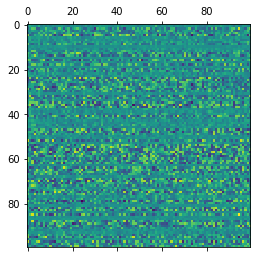

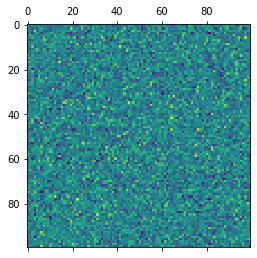

In [8]:
qq_index = 1
index1, index2 = 0, 10000
reshape1, reshape2 = 100, 100

real = list(qq.parameters())[qq_index].detach().numpy().reshape(reshape1, reshape2)
pred = qq(torch.LongTensor(np.arange(index1, index2).reshape(reshape1, reshape2))).detach().squeeze().numpy()

plt.matshow(real)
plt.matshow(pred)

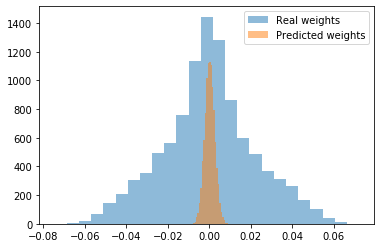

In [14]:
plt.figure()
plt.hist(real.flatten(), bins = 25, alpha = 0.5, label = 'Real weights')
plt.hist(pred.flatten(), bins = 25, alpha = 0.5, label = 'Predicted weights')
plt.legend()
plt.show()

In [10]:
real.flatten()[:10], pred.flatten()[:10]

(array([ 0.01239032,  0.00951849,  0.00498896,  0.00255512,  0.00825537,
         0.00828572,  0.00557677,  0.00639618, -0.00562744,  0.00377184],
       dtype=float32),
 array([ 6.4664031e-04, -7.2526082e-04,  8.7012479e-05, -1.5712728e-03,
         1.1250575e-03, -3.1988588e-03,  1.4561610e-03, -1.6132253e-03,
        -1.8374558e-03,  3.2171793e-03], dtype=float32))

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
mean_absolute_error(real.flatten(), pred.flatten()), mean_squared_error(real.flatten(), pred.flatten())

(0.016959416, 0.0004874632)

# Training Regeneration

In [15]:
qq = VanillaQuine()

In [16]:
qq

VanillaQuine(
  (embedding): Embedding(10000, 100)
  (linear): Linear(in_features=100, out_features=100, bias=False)
  (output): Linear(in_features=100, out_features=1, bias=False)
)

In [23]:
criterion = nn.MSELoss()
optimizer = optim.AdamW(qq.parameters(), lr=0.002)

generation_epochs = 2
optimization_epochs = 5
batch_size = 64

In [24]:
for g_epoch in range(generation_epochs):
    
    # random_indices = torch.LongTensor(np.random.randint(qq.get_num_of_parameters(), size = (batch_size, )))
    random_indices = np.random.permutation(qq.get_num_of_parameters())
    
    # optimization step
    for o_epoch in range(optimization_epochs):
        for i in range(batch_size, len(random_indices), batch_size):

            random_tensor = torch.LongTensor(random_indices[i-batch_size:i])
            y = qq(random_tensor)
            y_h = torch.Tensor(qq.flatten_parameteres())[random_tensor]

            optimizer.zero_grad()
            loss = criterion(y, y_h)
            loss.backward()
            optimizer.step()
            
    # regeneration step
    l = qq(torch.LongTensor(np.arange(0, 10000).reshape(100, 100))) # torch.Tensor(np.random.random(size=(100, 100)))
    qq.replace_weights(1, l.squeeze())
    
    print(g_epoch, loss)

/usr/local/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 tensor(0.0001, grad_fn=<MseLossBackward>)
1 tensor(1.3930e-06, grad_fn=<MseLossBackward>)


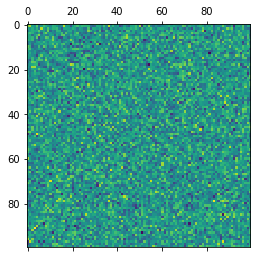

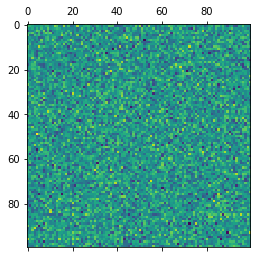

In [25]:
qq_index = 1
index1, index2 = 0, 10000
reshape1, reshape2 = 100, 100

real = list(qq.parameters())[qq_index].detach().numpy().reshape(reshape1, reshape2)
pred = qq(torch.LongTensor(np.arange(index1, index2).reshape(reshape1, reshape2))).detach().squeeze().numpy()

plt.matshow(real)
plt.matshow(pred)

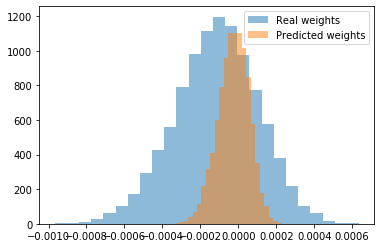

In [26]:
plt.figure()
plt.hist(real.flatten(), bins = 25, alpha = 0.5, label = 'Real weights')
plt.hist(pred.flatten(), bins = 25, alpha = 0.5, label = 'Predicted weights')
plt.legend()
plt.show()

In [27]:
real.flatten()[:10], pred.flatten()[:10]

(array([-1.1094335e-04, -1.2979392e-05, -5.6033692e-05, -6.3030899e-04,
        -2.5253140e-04, -2.7807913e-04,  1.2608086e-04,  3.8439129e-04,
        -2.3735287e-05,  2.4600595e-04], dtype=float32),
 array([ 1.4939134e-05,  1.0586442e-05,  6.9277208e-05, -1.0787039e-04,
        -8.2125807e-05, -2.1920552e-05, -2.0494328e-05,  2.0582518e-04,
         1.2952817e-04,  3.8674840e-05], dtype=float32))

In [28]:
mean_absolute_error(real.flatten(), pred.flatten()), mean_squared_error(real.flatten(), pred.flatten())

(0.00015725089, 3.9856197e-08)